In [129]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [130]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [166]:
df = pd.read_csv("../Python/Output/CotDiff.txt", sep='\t')
df.head()

,Order,Freq,X,Index Cot,Uncertainty,Value Error
0,4,1,0.196350,5.027339,8.912752e-16,0.000000e+00
1,4,2,0.392699,2.414214,4.367891e-16,0.000000e+00
2,4,3,0.589049,1.496606,2.663128e-16,0.000000e+00
3,4,4,0.785398,1.000000,2.026978e-16,-2.220446e-16
4,4,5,0.981748,0.668179,1.333328e-16,-1.110223e-16


In [168]:
df['Normalized Error'] = df['Value Error']/df['Uncertainty']
df['Absolute Error'] = np.abs(df['Value Error'])

# LibSin Errors Increase with FFT Order

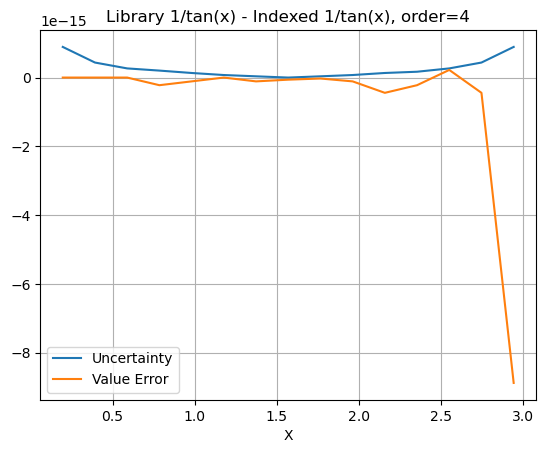

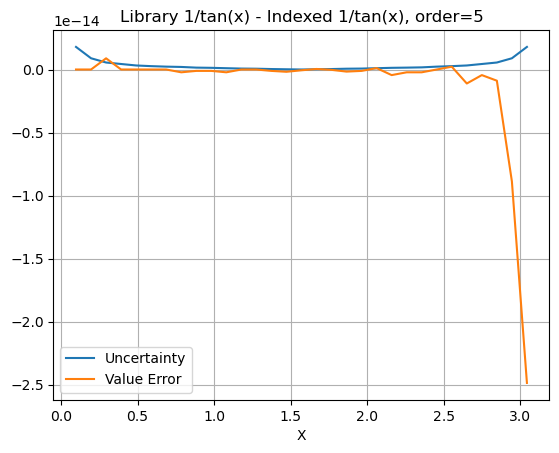

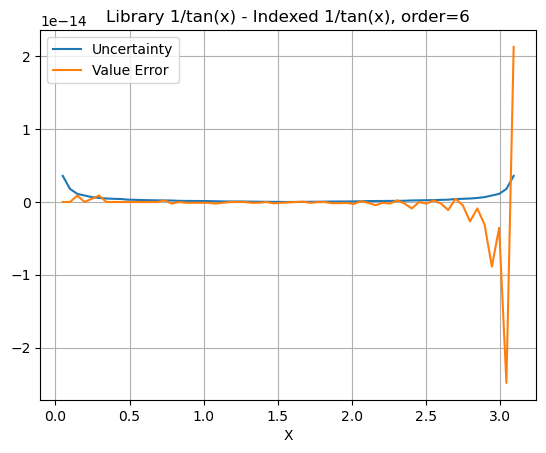

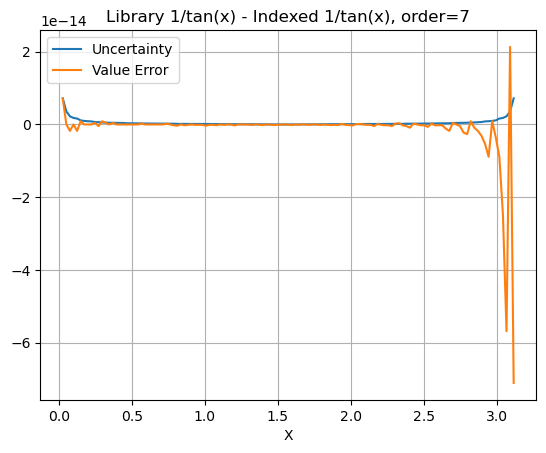

In [169]:
for order in range(4, 8):
    df[(df['Order']==order)].set_index('X')[['Uncertainty', 'Value Error']]\
        .plot(title=f'Library 1/tan(x) - Indexed 1/tan(x), order={order}', grid=True)

In [170]:
{order: df[(df['Order']==order) & (df['X'] > math.pi/16*15)]['Value Error'].std() for order in range(4, 17)}

{4: nan,
 5: nan,
 6: 2.3115401499210408e-14,
 7: 3.297443374843044e-14,
 8: 1.3872769622932148e-13,
 9: 1.5446934360782115e-12,
 10: 1.1225314117350113e-12,
 11: 1.073696381218577e-11,
 12: 2.2912201347850398e-11,
 13: 2.420510472253099e-11,
 14: 2.167865712430489e-10,
 15: 1.7718134254750616e-10,
 16: 4.148636408617792e-10}

In [171]:
{order: df[(df['Order']==order) & (df['X'] > math.pi/16*15)]['Normalized Error'].std() for order in range(4, 17)}

{4: nan,
 5: nan,
 6: 9.92149121500752,
 7: 10.313197739523254,
 8: 12.235948049790482,
 9: 55.186456987688025,
 10: 42.79139980486452,
 11: 99.27791364370611,
 12: 119.75014863878557,
 13: 101.38078654020579,
 14: 255.37290049806344,
 15: 206.76367055669948,
 16: 294.70208967308196}

In [143]:
sCtan = {order: df[(df['Order']==order)]['Absolute Error'].std() for order in range(4, 17)}
sCtan

{4: 2.2616360509362802e-15,
 5: 4.655361295161472e-15,
 6: 4.2069559768308065e-15,
 7: 8.535951866996034e-15,
 8: 9.506289680560948e-14,
 9: 1.0793969333028232e-12,
 10: 7.910955922384902e-13,
 11: 7.568476180729999e-12,
 12: 1.6179219265229083e-11,
 13: 1.7060747322653642e-11,
 14: 1.5321697831951515e-10,
 15: 1.2520455417983263e-10,
 16: 2.9333724576607996e-10}

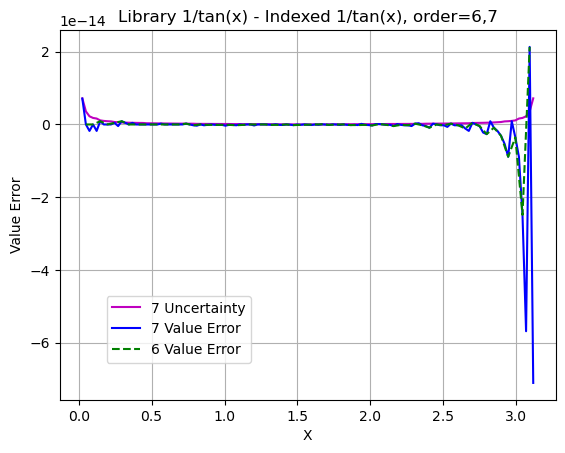

In [172]:
fig, ax = plt.subplots()
ax.set_title('Library 1/tan(x) - Indexed 1/tan(x), order=6,7')
ax.set_xlabel('X')
ax.set_ylabel('Value Error')
plt.grid(True)
ax.plot(df[df['Order']==7]['X'], df[df['Order']==7]['Uncertainty'], 'm-', label=f'7 Uncertainty')
ax.plot(df[df['Order']==7]['X'], df[df['Order']==7]['Value Error'], 'b-', label=f'7 Value Error')
ax.plot(df[df['Order']==6]['X'], df[df['Order']==6]['Value Error'], 'g--', label=f'6 Value Error')
ax.legend(bbox_to_anchor=(0.4, 0.3))

# Compare Lib sin(x) and Lib 1/tan(x)

In [173]:
dfSin = pd.read_csv("../Python/Output/SinDiff_Stat.txt", sep='\t')
dfSin.head()

,Order,Part,Count,Min,Max,AbsMax,Mean,Dev
0,4,Indexed,2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,4,Lib,126,-2.109424e-15,2.053913e-15,2.109424e-15,1.181793e-17,6.266661e-16
2,5,Indexed,4,-8.947608e-01,0.000000e+00,8.947608e-01,-2.236902e-01,3.874428e-01
3,5,Lib,508,-5.148659e-15,5.389684e-15,5.389684e-15,-2.295823e-19,1.291814e-15
4,6,Indexed,8,-8.947608e-01,0.000000e+00,8.947608e-01,-1.118451e-01,2.959143e-01


In [179]:
dfSin[dfSin['Part']=='Indexed'].head()

,Order,Part,Count,Min,Max,AbsMax,Mean,Dev
0,4,Indexed,2,0.000000,0.000000,0.000000,0.000000,0.000000
2,5,Indexed,4,-0.894761,0.000000,0.894761,-0.223690,0.387443
4,6,Indexed,8,-0.894761,0.000000,0.894761,-0.111845,0.295914
6,7,Indexed,16,-0.894761,1.822851,1.822851,-0.052156,0.593367
8,8,Indexed,32,-0.902585,1.822851,1.822851,-0.107437,0.731558


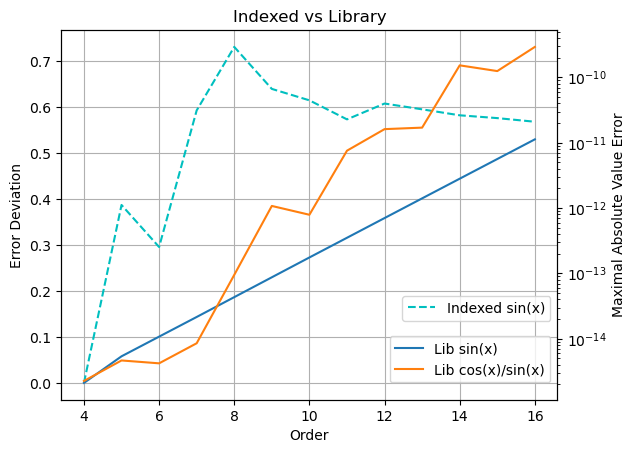

In [202]:
fig, ax = plt.subplots()
ax.set_title('Indexed vs Library')
ax.set_xlabel('Order')
plt.grid(True)

ax.set_ylabel('Error Deviation')
ax.plot(dfSin[dfSin['Part']=='Indexed']['Order'], dfSin[dfSin['Part']=='Indexed']['Dev'], 'c--', label='Indexed sin(x)')
ax.legend(bbox_to_anchor=(1, 0.3))

ax2 = ax.twinx()
ax2.set_ylabel('Maximal Absolute Value Error')
ax2.set_yscale('log')
ax2.plot(dfSin[dfSin['Part']=='Lib']['Order'], dfSin[dfSin['Part']=='Lib']['AbsMax'], label='Lib sin(x)')
ax2.plot(sCtan.keys(), sCtan.values(), label='Lib cos(x)/sin(x)')
ax2.legend(bbox_to_anchor=(1, 0.19))

